In [16]:
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')

In [2]:
from planet4 import markings

In [28]:
ids = ['pbr','1dt']

In [29]:
p4id = markings.ImageID(ids[1], scope='planet4')

In [30]:
blotches = p4id.get_blotches()

In [31]:
X = blotches['x y'.split()].values

### MeanShift

In [32]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [33]:
bandwidth = estimate_bandwidth(X, quantile=0.5)

In [34]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [35]:
ms.fit(X)

MeanShift(bandwidth=277.56431963486301, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [36]:
labels = ms.labels_

In [37]:
cluster_centers = ms.cluster_centers_

In [38]:
labels_unique = np.unique(labels)

In [39]:
n_clusters_ = len(labels_unique)
n_clusters_

2

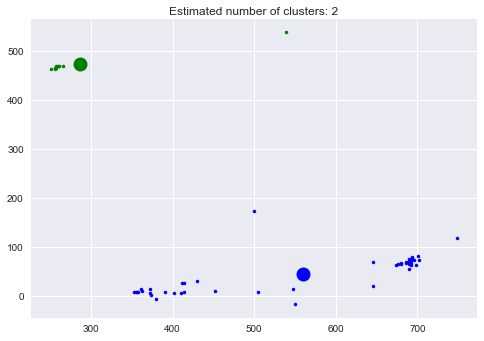

In [41]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    _=plt.plot(X[my_members, 0], X[my_members, 1], col + '.');
    _=plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14);
plt.title('Estimated number of clusters: %d' % n_clusters_)

### AffinityPropagation

In [42]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Silhouette Coefficient: 0.901


(0, 840)

(0, 648)

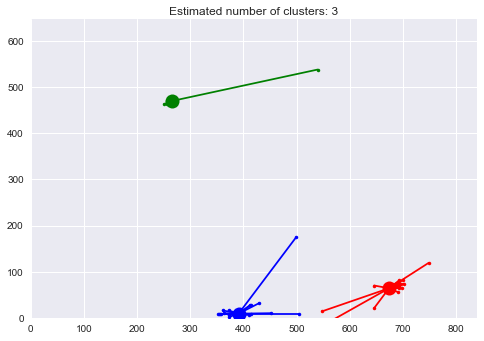

In [45]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    _ = plt.plot(X[class_members, 0], X[class_members, 1], col + '.');
    _ = plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14);
    for x in X[class_members]:
        _ = plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col);

plt.title('Estimated number of clusters: %d' % n_clusters_)
ax = plt.gca()
ax.set_xlim(0, markings.img_x_size)
ax.set_ylim(0, markings.img_y_size)

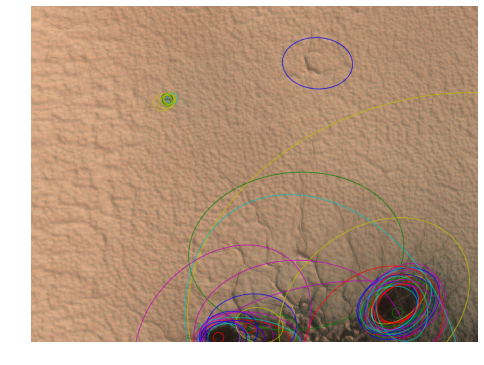

In [44]:
p4id.plot_blotches()
plt.gca().invert_yaxis()